In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [119]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize individual models
# Initialize models
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()

# Train models
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [121]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

dt_metrics = evaluate_model(y_test, y_pred_dt)
lr_metrics = evaluate_model(y_test, y_pred_lr)
knn_metrics = evaluate_model(y_test, y_pred_knn)

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'KNN'],
    'Accuracy': [dt_metrics[0], lr_metrics[0], knn_metrics[0]],
    'Precision': [dt_metrics[1], lr_metrics[1], knn_metrics[1]],
    'Recall': [dt_metrics[2], lr_metrics[2], knn_metrics[2]],
    'F1 Score': [dt_metrics[3], lr_metrics[3], knn_metrics[3]]
})

In [122]:
base_classifier = DecisionTreeClassifier(max_depth=1)
bagging = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging.predict(X_test)

# Evaluate Bagging model
bagging_metrics = evaluate_model(y_test, y_pred_bagging)

# Add Bagging to results table
new_row = pd.DataFrame([{
    'Model': 'Bagging (Decision Tree)',
    'Accuracy': bagging_metrics[0],
    'Precision': bagging_metrics[1],
    'Recall': bagging_metrics[2],
    'F1 Score': bagging_metrics[3]
}])

# Concatenate the new row with the existing results DataFrame
results = pd.concat([results, new_row], ignore_index=True)

In [123]:
# AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

gboost = GradientBoostingClassifier(n_estimators=50, random_state=42)
gboost.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
y_pred_gboost = gboost.predict(X_test)

ada_metrics = evaluate_model(y_test, y_pred_ada)
gboost_metrics = evaluate_model(y_test, y_pred_gboost)
ada_row = pd.DataFrame([{
    'Model': 'AdaBoost',
    'Accuracy': ada_metrics[0],
    'Precision': ada_metrics[1],
    'Recall': ada_metrics[2],
    'F1 Score': ada_metrics[3]
}])

gboost_row = pd.DataFrame([{
    'Model': 'Gradient Boosting',
    'Accuracy': gboost_metrics[0],
    'Precision': gboost_metrics[1],
    'Recall': gboost_metrics[2],
    'F1 Score': gboost_metrics[3]
}])

results = pd.concat([results, ada_row, gboost_row], ignore_index=True)

d:\College Notes\Third Year\ML\base\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


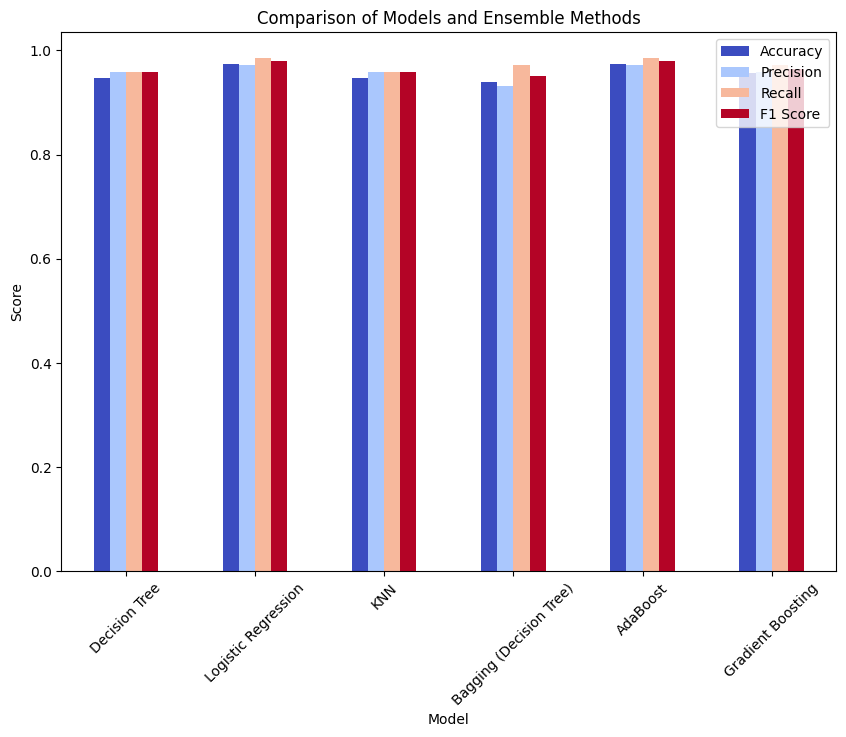

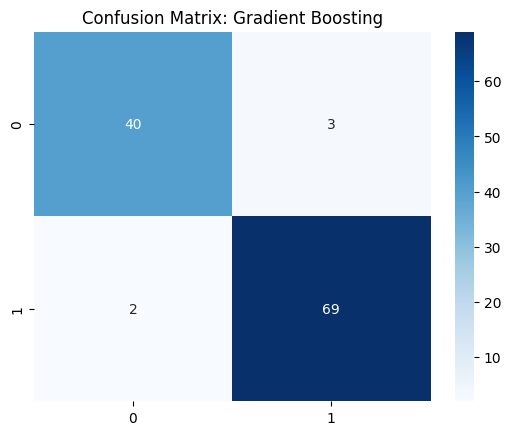

In [124]:
results.set_index('Model', inplace=True)
results.plot(kind='bar', figsize=(10, 7), colormap='coolwarm')
plt.title('Comparison of Models and Ensemble Methods')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Confusion Matrix Heatmap (for one model, e.g., Gradient Boosting)
cm = confusion_matrix(y_test, y_pred_gboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()
